In [2]:
pip install GPy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 959.4/959.4 KB 20.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.3/71.3 KB 9.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for GPy: filename=GPy-1.10.0-cp38-cp38-linux_x86_64.whl size=3424736 sha256=067b05d7c01b085ba93ff9c91556c0d5c6c07e7eeb7fa2d7f4710a7797c56362
  Stored in directory: /root/.cache/pip/wheels/48/b3/22/31f07cfd7b182ea3703151b7e5a7d6447e3e1ac6aa5c529413
  Created wheel for paramz: filename=paramz-0.9.5-py3-none-any.whl size=102566 sha256=56b160586af0ce7d6ec935ee46757adc8798a5f1de93e7298e0c4e350b5c8d24
  Stored in directory: /root/.cache/pip/wheels/66/78/6c/d98cb437834de5e29381786b4ba8a77ea68cca74653ab62713
Successfully built GPy paramz


In [3]:
pip install emukit


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 170.5/170.5 KB 7.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.2/46.2 KB 5.1 MB/s eta 0:00:00
  Created wheel for emukit: filename=emukit-0.4.10-py3-none-any.whl size=257070 sha256=2ee4371dfe452dc1a3c3a18f42ec312871cd043fec83fc04fcff168183c2dacf
  Stored in directory: /root/.cache/pip/wheels/9f/22/2f/daff2d230945e49b66d5bd44aa0860ee545d60f84823446cc1
Successfully built emukit


In [4]:
import GPy
import emukit.multi_fidelity
import emukit.test_functions
from emukit.model_wrappers.gpy_model_wrappers import GPyMultiOutputWrapper
from emukit.multi_fidelity.models import GPyLinearMultiFidelityModel
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors
colors = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)
%matplotlib inline

## Generate samples from the Forrester function



x_train_l =  np.array([[70,100],[70,80],[70,50],[70,30],[70,0],[60,100],[60,80],[60,50],[60,30],[60,0],[50,100],[50,80],[50,50],[50,30],[50,0],[40,100],[40,80],[40,50],[40,30],[40,0]])
x_train_h = np.array([[70,100],[70,0],[40,0],[40,100],[50,50],[60,80]])

y_train_l =  np.array([4.5608,
4.284,
3.9654,
3.7805,
3.5478,
2.5223,
2.333,
2.1315,
2.0013,
1.8682,
1.4417,
1.3231,
1.1671,
1.0813,
0.99393,
0.82499,
0.75554,
0.63434,
0.57971,
0.49856])
y_train_h = np.array([ 4.5608,3.5478,0.49856,0.82499,1.1671,2.333])

In [5]:
x_train_l=np.c_[ x_train_l, np.zeros(len(x_train_l)) ]   

In [6]:
x_train_h=np.c_[ x_train_h, np.ones(len(x_train_h)) ]   

In [7]:

X_train=np.append(x_train_l,x_train_h,axis=0)
Y_train=np.append(y_train_l,y_train_h,axis=0)
print(X_train)
print(Y_train)

[[ 70. 100.   0.]
 [ 70.  80.   0.]
 [ 70.  50.   0.]
 [ 70.  30.   0.]
 [ 70.   0.   0.]
 [ 60. 100.   0.]
 [ 60.  80.   0.]
 [ 60.  50.   0.]
 [ 60.  30.   0.]
 [ 60.   0.   0.]
 [ 50. 100.   0.]
 [ 50.  80.   0.]
 [ 50.  50.   0.]
 [ 50.  30.   0.]
 [ 50.   0.   0.]
 [ 40. 100.   0.]
 [ 40.  80.   0.]
 [ 40.  50.   0.]
 [ 40.  30.   0.]
 [ 40.   0.   0.]
 [ 70. 100.   1.]
 [ 70.   0.   1.]
 [ 40.   0.   1.]
 [ 40. 100.   1.]
 [ 50.  50.   1.]
 [ 60.  80.   1.]]
[4.5608  4.284   3.9654  3.7805  3.5478  2.5223  2.333   2.1315  2.0013
 1.8682  1.4417  1.3231  1.1671  1.0813  0.99393 0.82499 0.75554 0.63434
 0.57971 0.49856 4.5608  3.5478  0.49856 0.82499 1.1671  2.333  ]


In [8]:
print(X_train.shape[1])
Y_train=np.reshape(Y_train,(len(X_train),1))
print(Y_train)

3
[[4.5608 ]
 [4.284  ]
 [3.9654 ]
 [3.7805 ]
 [3.5478 ]
 [2.5223 ]
 [2.333  ]
 [2.1315 ]
 [2.0013 ]
 [1.8682 ]
 [1.4417 ]
 [1.3231 ]
 [1.1671 ]
 [1.0813 ]
 [0.99393]
 [0.82499]
 [0.75554]
 [0.63434]
 [0.57971]
 [0.49856]
 [4.5608 ]
 [3.5478 ]
 [0.49856]
 [0.82499]
 [1.1671 ]
 [2.333  ]]


In [9]:
kernels = [GPy.kern.RBF(2),GPy.kern.RBF(2)]
lin_mf_kernel = emukit.multi_fidelity.kernels.LinearMultiFidelityKernel(kernels)
gpy_lin_mf_model = GPyLinearMultiFidelityModel(X_train, Y_train, lin_mf_kernel, n_fidelities=2)
gpy_lin_mf_model.mixed_noise.Gaussian_noise.fix(0)
gpy_lin_mf_model.mixed_noise.Gaussian_noise_1.fix(0)

lin_mf_model =model=GPyMultiOutputWrapper(gpy_lin_mf_model, 4, n_optimization_restarts=200)

## Fit the model
  
lin_mf_model.optimize()


 /usr/local/lib/python3.8/dist-packages/paramz/transformations.py:111: RuntimeWarning:divide by zero encountered in log


Optimization restart 1/200, f = -1.7812516831429335
Optimization restart 2/200, f = -1.781922380554974
Optimization restart 3/200, f = -1.781922107630729
Optimization restart 4/200, f = 6.807911999936601
Optimization restart 5/200, f = 2.865619467149962
Optimization restart 6/200, f = -1.781922380508485
Optimization restart 7/200, f = 8.294531707613604
Optimization restart 8/200, f = -1.7819226464547224
Optimization restart 9/200, f = -1.7819219807528093
Optimization restart 10/200, f = -1.7813118019095153
Optimization restart 11/200, f = -1.781920381955434
Optimization restart 12/200, f = -1.7819225136821366
Optimization restart 13/200, f = -1.78192251376265
Optimization restart 14/200, f = -1.781922510702742
Optimization restart 15/200, f = -1.781922646909317
Optimization restart 16/200, f = -1.78192596604549
Optimization restart 17/200, f = -1.7819223806224151
Optimization restart 18/200, f = -1.781922247270714
Optimization restart 19/200, f = -1.7819224957956976
Optimization restar

In [10]:
## Compute mean and variance predictions
#testx = np.linspace(40,70, 100, endpoint=True)

#testy= np.linspace(0,100, 100, endpoint=True)


#x = [(a, b) for a in testx for b in testy] 
#x=np.array([x])
#x_plot=np.reshape(x,[10000,2])
x_plot=np.array([[70,50],[60,0],[60,30],[40,100],[50,80],[40,30]])
X_plot_l=np.c_[ x_plot, np.zeros(len(x_plot)) ]   
X_plot_h=np.c_[ x_plot, np.ones(len(x_plot)) ]   

print(x_plot)

[[ 70  50]
 [ 60   0]
 [ 60  30]
 [ 40 100]
 [ 50  80]
 [ 40  30]]


In [11]:


## Compute mean predictions and associated variance

## Compute mean predictions and associated variance

lf_mean_lin_mf_model, lf_var_lin_mf_model = lin_mf_model.predict(X_plot_l)

hf_mean_lin_mf_model, hf_var_lin_mf_model = lin_mf_model.predict(X_plot_h)






In [12]:
print(lf_mean_lin_mf_model)

[[3.96540128]
 [1.86819965]
 [2.00130287]
 [0.82498998]
 [1.3230973 ]
 [0.57971102]]


In [13]:
print(hf_mean_lin_mf_model)

[[3.96540014]
 [1.86819911]
 [2.00130229]
 [0.82498974]
 [1.32309692]
 [0.57971085]]


In [14]:
## Create standard GP model using only high-fidelity data
x_train_DNS=np.array([[70,0],[70,100],[70,50],[60,0],[60,30],[60,80],[50,80],[50,50],[40,0],[40,30],[40,100]])
y_train_DNS=np.array([3.5457,
4.7628,
4.0937,
1.8453,
2.0809,
2.4286,
1.3877,
1.2605,
0.6215,
0.69657,
0.88475
])
x_train_DNS=np.c_[ x_train_DNS, np.ones(len(x_train_DNS)) ]   
y_train_DNS=np.reshape(y_train_DNS,(len(x_train_DNS),1))


kernel = GPy.kern.RBF(2)

In [15]:
high_gp_model = GPy.models.GPRegression(x_train_DNS, y_train_DNS, kernel)
high_gp_model.Gaussian_noise.fix(0)

## Fit the GP model

high_gp_model.optimize_restarts(100)

Optimization restart 1/100, f = 25.85043186139212
Optimization restart 2/100, f = 25.85043186138691
Optimization restart 3/100, f = 25.8504318613869
Optimization restart 4/100, f = 25.850431861386976
Optimization restart 5/100, f = 25.850431861386994
Optimization restart 6/100, f = 25.850431861417437


 /usr/local/lib/python3.8/dist-packages/GPy/core/gp.py:85: UserWarning:Your kernel has a different input dimension 2 then the given X dimension 3. Be very sure this is what you want and you have not forgotten to set the right input dimenion in your kernel


Optimization restart 7/100, f = 25.85043186153486
Optimization restart 8/100, f = 25.85043186138719
Optimization restart 9/100, f = 25.850431861386905
Optimization restart 10/100, f = 25.85043186138692
Optimization restart 11/100, f = 25.850431861386944
Optimization restart 12/100, f = 25.850431861389048
Optimization restart 13/100, f = 25.85043186141251
Optimization restart 14/100, f = 25.8504318614179
Optimization restart 15/100, f = 25.850431861388458
Optimization restart 16/100, f = 25.85043186139638
Optimization restart 17/100, f = 25.850431861386916
Optimization restart 18/100, f = 25.850431861389538
Optimization restart 19/100, f = 25.850431861420972
Optimization restart 20/100, f = 25.850431861398633
Optimization restart 21/100, f = 25.850431861386927
Optimization restart 22/100, f = 25.850431861386898
Optimization restart 23/100, f = 25.85043186139331
Optimization restart 24/100, f = 25.850431861397276
Optimization restart 25/100, f = 25.8504318613869
Optimization restart 26/1

In [16]:
hf_mean_high_gp_model, hf_var_high_gp_model  = high_gp_model.predict(x_plot)


In [17]:
print(hf_mean_high_gp_model)
print(hf_mean_lin_mf_model)

[[4.09369996]
 [1.84530003]
 [2.08090002]
 [0.88475002]
 [1.38769989]
 [0.69657001]]
[[3.96540014]
 [1.86819911]
 [2.00130229]
 [0.82498974]
 [1.32309692]
 [0.57971085]]


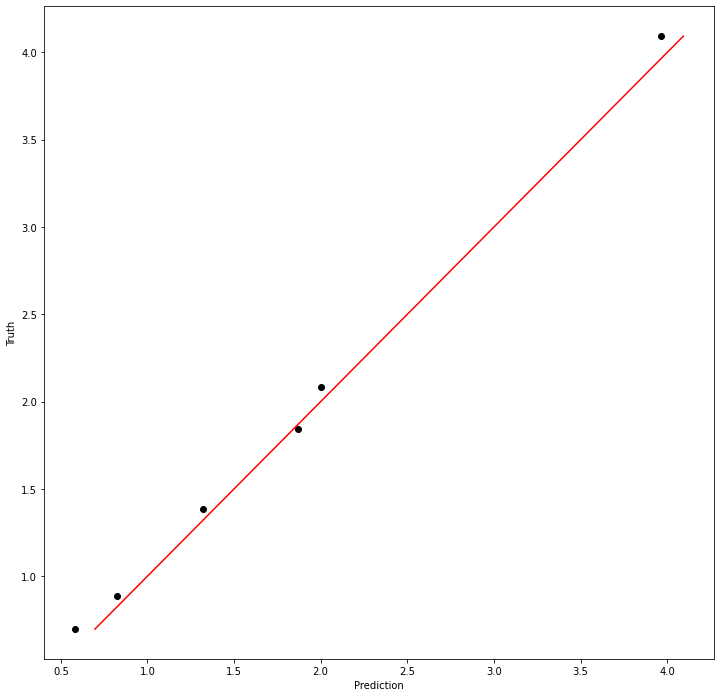

In [18]:
plt.figure(figsize=(12, 12))
plt.scatter(hf_mean_lin_mf_model, hf_mean_high_gp_model, c='black')
min_max = [hf_mean_high_gp_model.min(),hf_mean_high_gp_model.max()]
plt.plot(min_max, min_max, color='r')
plt.ylabel('Truth')
plt.xlabel('Prediction');

 /usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:1718: UserWarning:`shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.


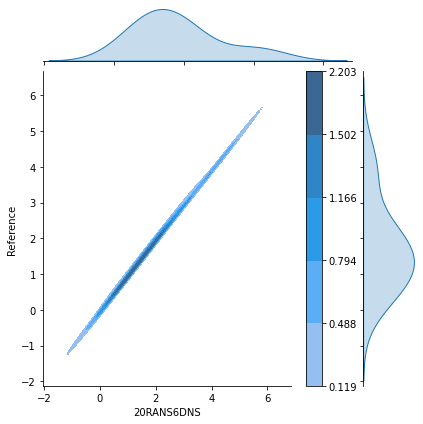

In [21]:
import pandas as pd
import seaborn as sns
df=pd.DataFrame({'20RANS6DNS': hf_mean_high_gp_model.flatten(),'Reference':hf_mean_lin_mf_model.flatten()})
rel=sns.jointplot(x="20RANS6DNS", y="Reference", kind = "kde",data = df, fill=True, n_levels = 6, shade = True, cbar = True, shade_lowest = False)
#rel.fig.suptitle("k=0.96")

plt.show()
